In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import numpy as np
import gsw 

from T_S_diagram import ts_diagram

from data_loading import get_LADCP, get_SADCP,get_2021_CTD_data


In [82]:
# Load the data from the file
year = 2021

SADCP = get_SADCP(year)
LADCP = get_LADCP(year)
CTD = get_2021_CTD_data()

/Users/georgiamcquade/Desktop/MOCIS/M2 - S2/FOET/FOET_Northern_Gyre/data_loading.py:76: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds = xr.Dataset(


KeyError: "No variable named 'idx'. Variables on the dataset include ['U', 'V', 'station', 'depth', 'latitude', 'longitude', 'time', 'leg']"

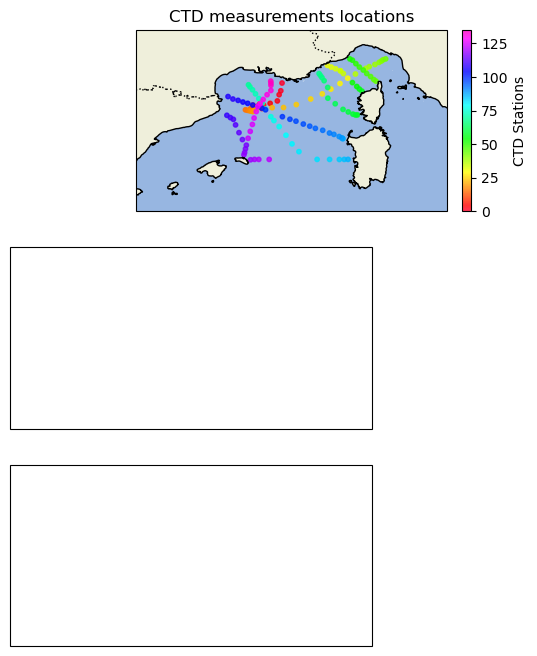

In [83]:
fig, ax = plt.subplots(3,1,figsize=(10,8),subplot_kw={'projection': ccrs.PlateCarree()})
ax.flatten()

sc = ax[0].scatter (CTD['longitude'],CTD['latitude'], s=10, c=CTD['idx'], cmap='gist_rainbow', alpha=0.8)
ax[0].set_extent([0, 12, 38, 45])
ax[0].add_feature(cfeature.LAND)
ax[0].add_feature(cfeature.COASTLINE)
ax[0].add_feature(cfeature.OCEAN)
ax[0].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[0], orientation='vertical', pad=0.02)
cbar.set_label('CTD Stations')
ax[0].set_title('CTD measurements locations')


sc = ax[1].scatter (SADCP['longitude'],SADCP['latitude'], s=10, c=SADCP['idx'], cmap='gist_rainbow', alpha=0.8)
ax[1].set_extent([0, 12, 38, 45])
ax[1].add_feature(cfeature.LAND)
ax[1].add_feature(cfeature.COASTLINE)
ax[1].add_feature(cfeature.OCEAN)
ax[1].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[1], orientation='vertical', pad=0.02)
cbar.set_label('SADCP Stations')
ax[1].set_title('SADCP measurements locations')


sc = ax[2].scatter (LADCP['longitude'],LADCP['latitude'], s=10, c=LADCP['idx'], cmap='gist_rainbow', alpha=0.8)
ax[2].set_extent([0, 12, 38, 45])
ax[2].add_feature(cfeature.LAND)
ax[2].add_feature(cfeature.COASTLINE)
ax[2].add_feature(cfeature.OCEAN)
ax[2].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[2], orientation='vertical', pad=0.02)
cbar.set_label('LADCP Stations')
ax[2].set_title('LADCP measurements locations')

plt.show()

[[27.21594742 27.25845622 27.30096547 ... 29.21434573 29.25687538
  29.29940546]
 [27.16549017 27.20796613 27.25044256 ... 29.16234935 29.20484635
  29.24734378]
 [27.1144661  27.1569094  27.19935316 ... 29.10979429 29.15225881
  29.19472376]
 ...
 [24.27181072 24.31294249 24.35407486 ... 26.20566134 26.2468215
  26.28798224]
 [24.19728752 24.23839307 24.27949924 ... 26.12990861 26.17104266
  26.2121773 ]
 [24.12230214 24.16338158 24.20446163 ... 26.05369821 26.09480624
  26.13591487]]


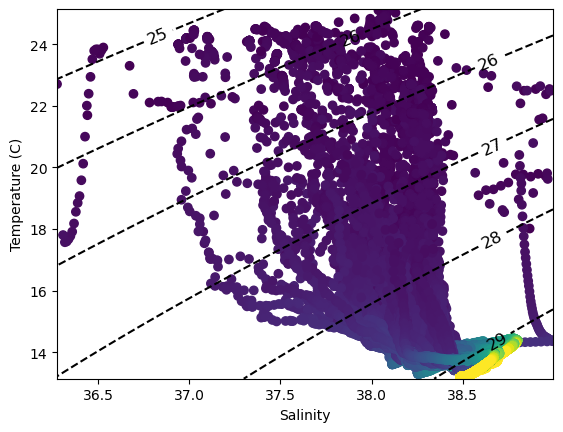

In [84]:

def ts_diagram(salt,temp,Pres):
    
    ## author : Yannis Cuypers 

    '''function for TS siagram with pressure(depth) in color'''
    #generating gridded values of salinity temp
    si=np.linspace(np.nanmin(salt),np.nanmax(salt))
    ti=np.linspace(np.nanmin(temp),np.nanmax(temp))
    
    
    # Calculate how many gridcells we need in the x and y dimensions
    xdim = len(si)
    ydim = len(ti)
    
    # Create empty grid of zeros
    dens = np.zeros((ydim,xdim))
    
   
    
    # Loop to fill in grid with densities
    for j in range(0,int(ydim)):
        for i in range(0, int(xdim)):
            #dens[j,i]=sw.dens(si[i],ti[j],0)
            dens[j,i]=gsw.rho(si[i],ti[j],0)
    
    # Substract 1000 to convert to sigma-t
    dens = dens - 1000
    print(dens)
    # Plot data *********************************************
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')
    plt.clabel(CS, fontsize=12, inline=1, fmt='%1.0f') # Label every second level
    #ax1.set_clim(0,10)
    #ax1.plot(salt,temp,'or',markersize=9)
    ax1.scatter(salt,temp,c=Pres,vmin=1, vmax=500)
    ax1.set_xlabel('Salinity')  
    ax1.set_ylabel('Temperature (C)')
    plt.show()
ts_diagram(CTD['salinity'],CTD['temperature'],CTD['pressure'])

In [66]:
CTD

<xarray.Dataset> Size: 9MB
Dimensions:      (idx: 136, depth: 2901)
Coordinates:
  * idx          (idx) int64 1kB 0 1 2 3 4 5 6 7 ... 129 130 131 132 133 134 135
  * depth        (depth) float64 23kB -0.0 -0.9921 ... -2.856e+03 -2.857e+03
    latitude     (idx) float64 1kB 42.95 42.65 42.5 42.26 ... 42.86 42.95 43.03
    longitude    (idx) float64 1kB 5.629 5.582 5.517 5.448 ... 5.2 5.2 5.194
    time         (idx) datetime64[ns] 1kB 2021-06-09 2021-06-09 ... 2021-07-02
    file_name    (idx) object 1kB 'moose2021_ge_leg1_001.cnv' ... 'moose2021_...
Data variables:
    temperature  (idx, depth) float64 3MB nan nan 19.99 20.11 ... nan nan nan
    salinity     (idx, depth) float64 3MB nan nan 37.97 37.97 ... nan nan nan
    pressure     (idx, depth) float64 3MB 0.0 1.0 2.0 ... 2.899e+03 2.9e+03